In [2]:
import pandas as pd
from PIL import Image
import os
import warnings
from urllib.request import urlopen
warnings.filterwarnings("ignore", category=FutureWarning)
from fbref import SoccerPlot
from utils import *


d:\Anaconda\envs\FluminenseAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Example usage

In [4]:
BASE_DIR = os.path.join('..', 'data')
RAW_DIR = os.path.join(BASE_DIR, 'raw', '2023', 'Brazilian Serie A')
std_csv = os.path.join(RAW_DIR, 'standard.csv')
df = pd.read_csv(std_csv)

In [6]:
df.head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,...,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Player Link_,Player ID_,Competition
0,1,Nicolás Acevedo,URU,MF,Bahia,23.0,1999.0,31,21,1970,...,0.00,0.00,0.04,0.05,0.10,0.04,0.10,https://fbref.com/en/players/6140be7b/Nicolas-...,6140be7b,Brazilian Serie A
1,2,Luiz Adriano,BRA,FW,Internacional,35.0,1987.0,29,17,1330,...,0.20,0.27,0.18,0.09,0.27,0.18,0.27,https://fbref.com/en/players/2557c196/Luiz-Adr...,2557c196,Brazilian Serie A
2,3,Adriel,BRA,GK,Grêmio,22.0,2001.0,2,2,180,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,https://fbref.com/en/players/11ad100a/Adriel,11ad100a,Brazilian Serie A
3,4,Adryelson,BRA,DF,Botafogo (RJ),24.0,1998.0,35,35,2996,...,0.03,0.06,0.03,0.01,0.04,0.03,0.04,https://fbref.com/en/players/e980e78d/Adryelson,e980e78d,Brazilian Serie A
4,5,Adson,BRA,"FW,MF",Corinthians,22.0,2000.0,15,9,857,...,0.00,0.11,0.04,0.11,0.15,0.04,0.15,https://fbref.com/en/players/eda38706/Adson,eda38706,Brazilian Serie A


In [7]:
df = df.loc[(df['Pos'].str.contains('FW')) & (df["Playing Time_Min"] > 500)]


In [8]:
cols_filter = df.filter([
                            'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'
]).columns

plot = SoccerPlot(df, cols_filter)

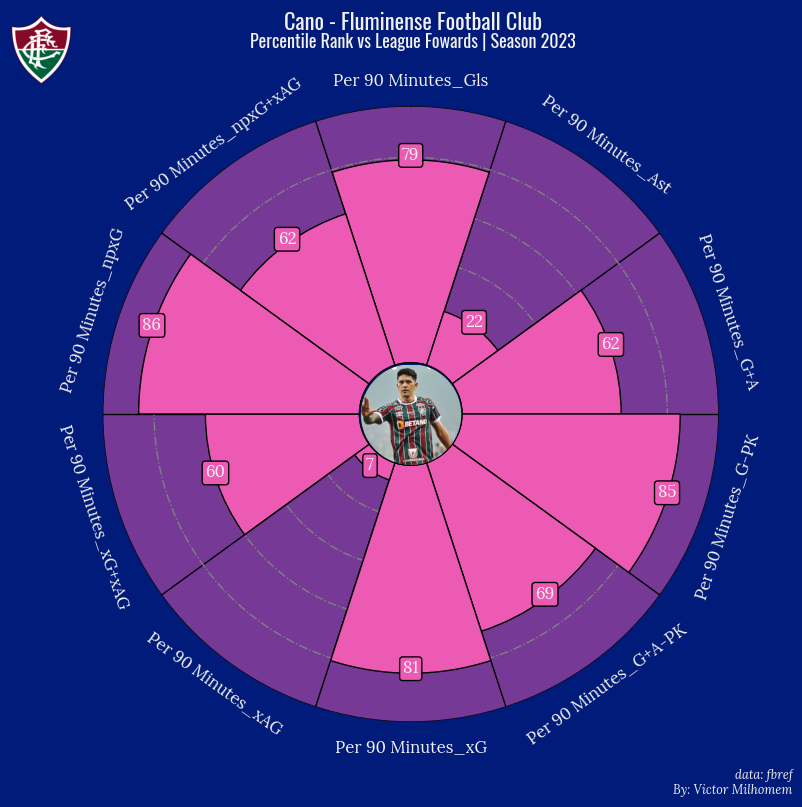

In [9]:
title = "Cano - Fluminense Football Club"
subtitle = "Percentile Rank vs League Fowards | Season 2023"
player_image = Image.open(urlopen('https://tmssl.akamaized.net/images/foto/galerie/german-cano-1695926165-117979.jpeg?lm=1695926174'))
team_image = Image.open(urlopen('https://tmssl.akamaized.net/images/wappen/head/2462.png?lm=1648225934'))
plot.generate_simple_pizza_plot('Germán Cano', title, subtitle, 'data: fbref', 'By: Victor Milhomem', player_image, team_image, color_palette=COLORS_PALETTE_9)

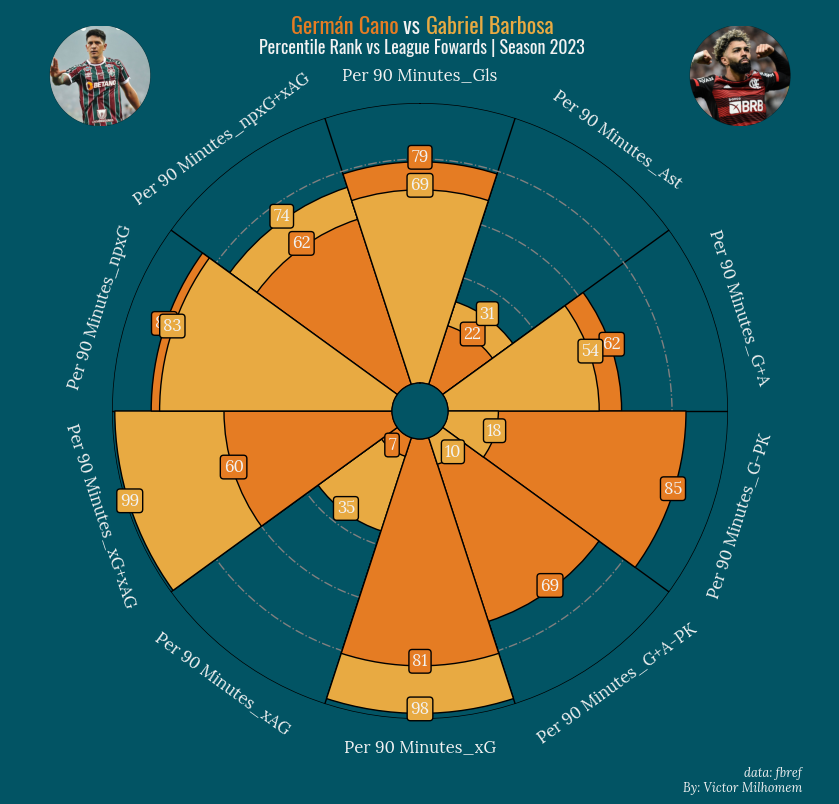

In [10]:
subtitle = "Percentile Rank vs League Fowards | Season 2023"
player2_image = Image.open(urlopen('https://tmssl.akamaized.net/images/foto/galerie/gabriel-barbosa-flamengo-2022-1660679253-90334.jpg?lm=1660679293'))
plot.generate_compare_pizza_plot('Germán Cano', 'Gabriel Barbosa', subtitle, 'data: fbref', 'By: Victor Milhomem', player_image, player2_image, color_palette=COLORS_PALETTE_7)